# k-NN classifier

The purpose of that assignment is to design a k-NN classifier for each class, and classify the images from k closest sample of the dataset.

--> Work done by the student DURAND--VEGAS JOHANN 

# Setup

In [392]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter
from tqdm import tqdm

plt.ion()

root_ds = '.'

## Mounting Google Drive (Google Colab only)
First, we'll mount the distant Google Drive locally. We assume here you have created a shortcut `2020-MSAIMove_computervision_shared` pointing to the class shared folder.

Rather than downloading, distant mounting ensure fast access without need of download.

In [393]:
if 'google.colab' in str(get_ipython()):
  import os
  from google.colab import drive
  drive.mount('/content/drive')
  
  #root_ds = '/content/drive/MyDrive/2021-MSAIMove_computervision_shared/datasets/'
  root_ds = '/content/drive/MyDrive/Colab Notebooks/datasets'
  assert(os.path.exists(root_ds))

  #! cp /content/drive/MyDrive/2021-MSAIMove_computervision_shared/common/image_tools.py .
  #! cp /content/drive/MyDrive/2021-MSAIMove_computervision_shared/common/input_tools.py .

  import sys
  sys.path.append(os.path.abspath('/content/drive/MyDrive/Colab Notebooks/common'))


import image_tools, input_tools

if 'google.colab' in str(get_ipython()):
  input_tools.root_path = os.path.join(root_ds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Classification

First, let's define which database and distance function we want to use

In [436]:
db_name = 'cifar-100'  # db1 | db2 | cifar-100
distance = "L1"  # L1 | L2
knn_k = 5

assert(knn_k % 2 == 1)

classif_score = 0.

# Load DB
# Return classes as N (class_name), train_data as Nx2 (class_idx, image), test_data as Nx2 (class_idx, image)
classes, train_data, test_data = input_tools.load_db(db_name)

In [437]:
print(f'Types:\nClasses type: {type(classes)}\nTrain data type: {type(train_data)}\nTest data type: {type(test_data)}')
print(f'\nLength Classe: {len(classes)}')
print(f'\nDimensions Train data: {np.shape(train_data)}\nDimensions Test data: {np.shape(test_data)}')

Types:
Classes type: <class 'list'>
Train data type: <class 'numpy.ndarray'>
Test data type: <class 'numpy.ndarray'>

Length Classe: 20

Dimensions Train data: (50000, 2)
Dimensions Test data: (10000, 2)


In [438]:
# Examples for accessing some data (just as a reminder)
# train_data = ...
# x = train_data[2, 0]                       # Getting the class of the 3rd image (index 2): shape 1
# x = train_data[train_data[:, 0]==2]        # Getting all samples of the 3rd class (index 2): shape nx2 (n the number of samples) 
# x = train_data[train_data[:, 0]==0][1]     # Getting the 5th image (index 4) of the 1st class (index 0): shape HxWx3
# x = train_data[:, 0]                       # Getting all classes: shape n (n the number of samples) 

Now, let's build the classifier for each class.

In [439]:
# Build classifiers
classifiers = np.zeros_like(classes, dtype=np.object)
print(classifiers)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [440]:
# Train classifiers
for i, c in enumerate(classes):
    print("%s" % c)

    # TODO: Select the train data for classes index i (i.e. the image where class_idx==i)
    class_data = train_data[train_data[:,0]==i] ###
    #classifiers[i] = knn_train(class_data)
    classifiers[i] = class_data[:, 1]

aquatic_mammals
fish
flowers
food_containers
fruit_and_vegetables
household_electrical_devices
household_furniture
insects
large_carnivores
large_man-made_outdoor_things
large_natural_outdoor_scenes
large_omnivores_and_herbivores
medium_mammals
non-insect_invertebrates
people
reptiles
small_mammals
trees
vehicles_1
vehicles_2


In [441]:
# Visualize len classifiers
print('\nLength Classifiers', len(classifiers))
#for i in [*range(len(classifiers))]:
#  print(f"Length Classifiers room {i} is  {len(classifiers[i])}")
#print('\nLength Classifiers[0][0]', len(classifiers[0][0]))
#print(len(classifiers[0][0][0]))


Length Classifiers 20


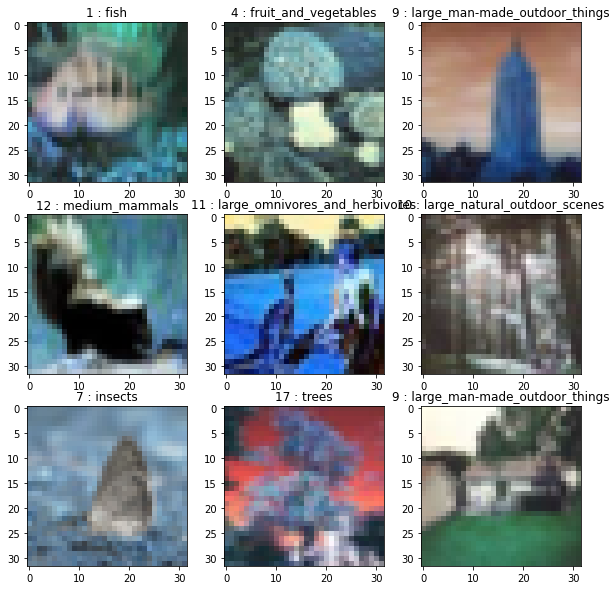

In [442]:
import random

# Visualize random sample from classifiers object
plt.figure(figsize=(10,10))
for i in [*range(9)]:
  Num_classe = random.choice([*range(len(classes))])
  plt.subplot(3, 3, i+1)
  plt.imshow(classifiers[Num_classe][i])
  plt.title(str(Num_classe)+' : '+classes[Num_classe])
  #plt.axis("off")

Write the knn test function, taking as input all 

1.   Élément de liste
2.   Élément de liste

classifiers and the query image **q**, it should return the index of the query class.
The second part of the code, is looping through the first 50 images and testing them with your `knn_test()` function.

Remember that to find the right class, you need to first compute the distances of the image to all samples, order them by distance, and then take the dominant classes amont the **k** first sample classes.

In [443]:
def knn_test(classifiers, q):
    k = knn_k
    
    # create an object that will contain the number of the class to which 
    # the image is compared and the distance between said images
    distances = []

    # Compute Mx2 array of distances for query image q: (class, distance)
    if distance == "L1":
        #__TODO: Code the L1 distance between classifiers and q
        #__distances = ...

        [ [distances.append([np.sum(np.abs(classifiers[i][j] - q)), i]) for j in [*range(len(classifiers[0]))] for i in [*range(len(classifiers))]] ]

        pass
    elif distance == "L2":
        #__TODO: Code the L2 distance between classifiers and q
        #__distances = ...

        [ [distances.append([np.sqrt(np.sum(np.abs(classifiers[i][j] - q)**2)), i]) for j in [*range(len(classifiers[0]))] for i in [*range(len(classifiers))]] ]

        pass
    else:
        raise NotImplementedError()


    #__Retrieve the k closest classes using "distances"
    #__Return the dominant class
  
    # Select the k smallest distance
    Sort_dist = sorted(distances) 
    k_dist =  sorted(distances)[:k]

    # Determine the class
    c = Counter([k_dist[i][1] for i in range(len(k_dist))])
    prediction = c.most_common(1)[0][0]

    # Display more details at each iteration
    #print(f"\nThe {k} minimum distance(s) is/are:\n{k_dist}\nThen the predicted class is {prediction}:{classes[prediction]}")
    #print(f'Prediction returned : {prediction}\n')

    return prediction  # Change this line (of course)


#__Test classifiers

test_data = test_data[:100]  # Select the 100 first
predictions = np.zeros(test_data.shape[0], dtype=np.int)

for i in tqdm(range(len(test_data))):
    if i % 10 == 0:
        print('Test %d / %d' % (i, len(test_data)))

    label, q = test_data[i]

    predictions[i] = knn_test(classifiers, q)

# Convertion from type array to list
True_Labels = test_data[:,0].tolist()

print('\n', True_Labels)
print(predictions)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0%|          | 0/100 [00:00<?, ?it/s]

Test 0 / 100


 10%|█         | 10/100 [00:11<01:42,  1.14s/it]

Test 10 / 100


 20%|██        | 20/100 [00:23<01:35,  1.19s/it]

Test 20 / 100


 30%|███       | 30/100 [00:35<01:23,  1.19s/it]

Test 30 / 100


 40%|████      | 40/100 [00:46<01:09,  1.16s/it]

Test 40 / 100


 50%|█████     | 50/100 [00:58<00:58,  1.16s/it]

Test 50 / 100


 60%|██████    | 60/100 [01:10<00:46,  1.17s/it]

Test 60 / 100


 70%|███████   | 70/100 [01:21<00:34,  1.15s/it]

Test 70 / 100


 80%|████████  | 80/100 [01:33<00:22,  1.14s/it]

Test 80 / 100


 90%|█████████ | 90/100 [01:45<00:11,  1.16s/it]

Test 90 / 100


100%|██████████| 100/100 [01:56<00:00,  1.17s/it]


 [10, 10, 0, 4, 10, 2, 11, 7, 10, 4, 10, 12, 19, 19, 5, 8, 2, 8, 2, 4, 2, 10, 12, 15, 11, 3, 5, 18, 18, 2, 6, 3, 19, 15, 17, 1, 18, 14, 6, 9, 12, 7, 10, 1, 17, 5, 19, 18, 12, 9, 0, 7, 3, 4, 14, 1, 10, 17, 8, 19, 13, 15, 11, 16, 7, 14, 8, 2, 12, 2, 12, 18, 1, 1, 1, 1, 2, 3, 13, 5, 10, 15, 2, 7, 15, 19, 15, 10, 14, 1, 5, 7, 15, 11, 18, 11, 16, 12, 9, 14]
[10 12  0  0 10  1 15  0 10  0 16  3  9 19  5 15  3  9  2  2  3 10  6 10
 10  3 10 13 14  3  6  1 19  1 17  0  4 10  3 17  0  9 10 10 17  5 15 14
  5 10  0  9  3 13 14 14  1 17  8 10 13 15 13 15  2  5 12  7 12  8  5 10
 16  1  1 17  2  4  7  3 10 15 13 17  1 14 10 10 11  1 13 13  0  3 11 11
  5 16  9 17]


In [444]:
# Compute Accuracy
accuracy = accuracy_score(True_Labels, predictions)
print("With k = %s and the %s distance, the accuracy of the KNN Classifier is: %s"% (knn_k, distance, accuracy))

With k = 5 and the L1 distance, the accuracy of the KNN Classifier is: 0.32


Finally, this piece of code allow you to visualize the output

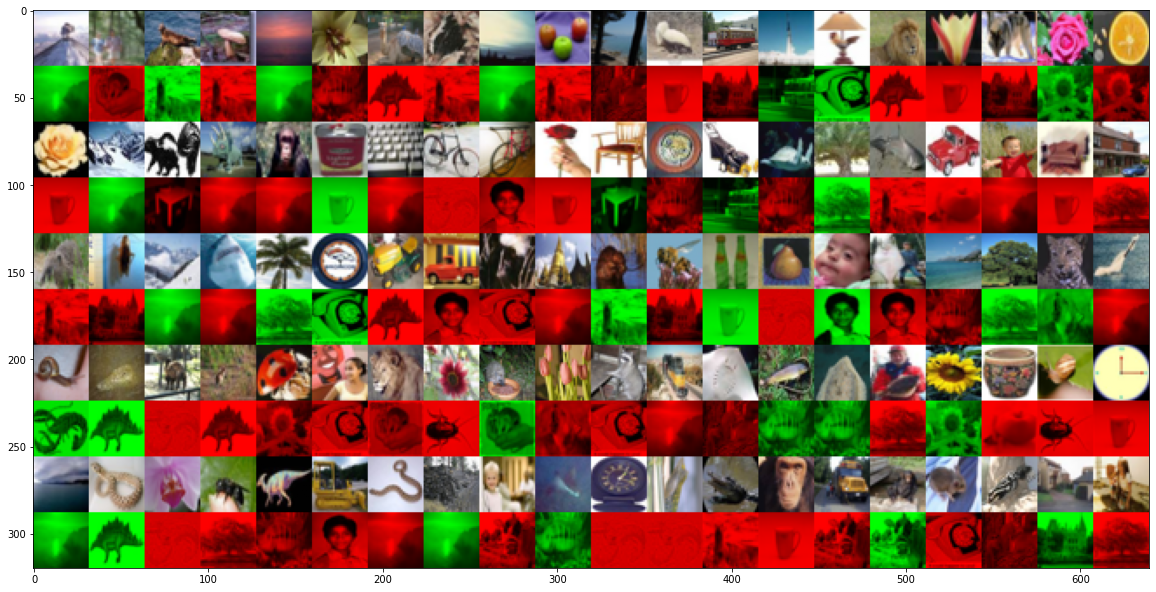

In [445]:
# TODO: Compute precision score and display it
#print("Classification score %.3f" % classif_score)

# TODO: Uncomment the following lines when your code is ready ONLY
# ----
# Write the output as a concatenation of images
output = [np.vstack([test_data[i, 1], classifiers[label_p][0] * ([[[0, 1, 0]]] if label_p == test_data[i, 0] else [[[0, 0, 1]]])]) for i, label_p in enumerate(predictions)]
output_gallery = image_tools.gallery_db(output, 20)

#plt.figure('output_gallery')
plt.figure(figsize=(20,20))
plt.imshow(output_gallery[..., ::-1])
plt.show()
# ----

RESUME


KNN_K = 1

° db1

L1: Accuracy = 1.0

L2: Accuracy = 0.9

° db2

L1: Accuracy = 0.867

L2: Accuracy = 0.66

cifar-100

L1: Accuracy = 0.33

L2: Accuracy = 0.22


KNN_K = 3

° db1

L1: Accuracy = 1.0

L2: Accuracy = 0.9

° db2

L1: Accuracy = 0.8

L2: Accuracy = 0.66

cifar-100

L1: Accuracy = 0.35

L2: Accuracy = 0.26

KNN_K = 5

° db1

L1: Accuracy = 1.0

L2: Accuracy = 1.0

° db2

L1: Accuracy = 0.93

L2: Accuracy = 0.66

cifar-100

L1: Accuracy = 0.32

L2: Accuracy = 0.2

KNN_K = 7

° db1

L1: Accuracy = 1.0

L2: Accuracy = 1.0

° db2

L1: Accuracy = 0.8

L2: Accuracy = 0.73

cifar-100

L1: Accuracy = 0.29

L2: Accuracy = 0.26

CONCLUSION

First, we notice that the KNN model is an interesting model for datasets with few classes. Indeed, for the dataset db1 containing only 2 classes the results are excellent (accuracy = 1). However, the more the number of classes increases, the more the model tends to make prediction errors. 

Regarding the number of nearest neighbors to consider, the models seem to perform better whatever the number of classes when 3 or even 5 neighbors are taken into consideration. However, the performance is not proportional to the number of neighbors considered. Indeed, with 7 or more neighbors, the performances do not improve significantly, and may even decrease.

Lastly, we notice that the calculation of the distance between the image to be predicted and the images of the training dataset systematically gives better results using the L1 formula than the L2 formula.

# # # # # # # # # # # # # # # # # # # # # # # # # # 

Finally, at the end of this exercise, we notice that the use of KNNs can be a good alternative for classification problems with few classes (2-3). However, for datasets with more classes, it will be necessary to turn to other more elaborate solutions such as deep learning models. 